Links :


*   https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/ 
*   https://www.kaggle.com/code/maharshipandya/mnist-using-knn-97
* 



# Chapter 3, Q1
Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).


## Imports

In [ ]:
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt                        
import numpy as np
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sys

## Load the Data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## Take a quick look at the data

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print('Shape of X_train: ', X_train.shape) # 6000 images, 28*28 pixel
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape) # 1000 images, 28*28 pixel
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


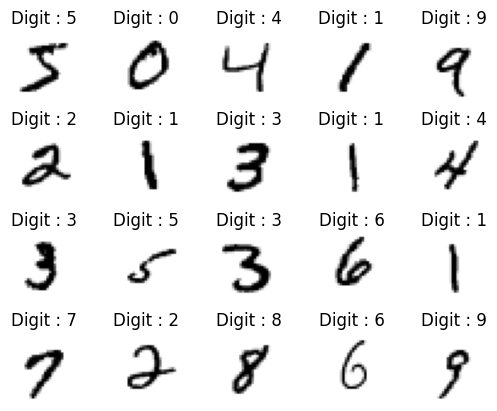

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Text(0.5, 0, 'Intensity')

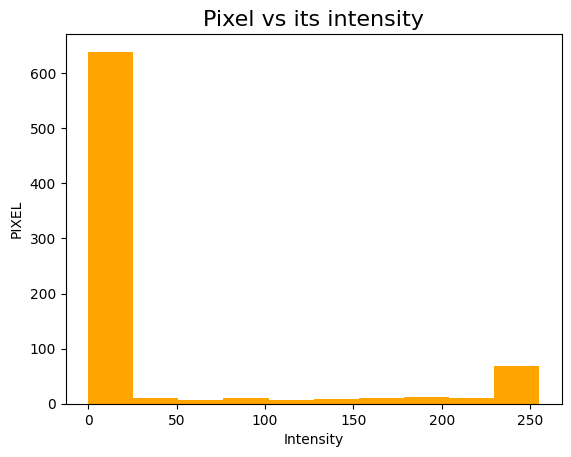

In [ ]:
plt.hist(X_train[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

<Axes: xlabel='0'>

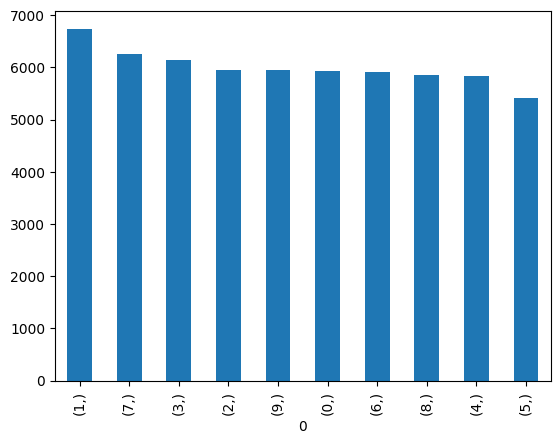

In [ ]:
pd.DataFrame(y_train).value_counts().plot.bar()

## Preprocessing

In [ ]:
# Normalizing and splitting the train data into a validation set and traing set
X_valid, X_train = X_train[:5000].astype('float32') / 255, X_train[5000:].astype('float32') / 255
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test.astype('float32') / 255

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
y_train.shape

(55000,)

In [ ]:
# Flatten the training data (55000,28,28) --> (5000,784)
X_train = np.reshape(X_train, (-1, 784))
X_valid = np.reshape(X_valid, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

In [ ]:
X_train.shape

(55000, 784)

In [ ]:
# [5] - [0,0,0,0,0,1,0,0,0,0]
#y_train = keras.utils.to_categorical(y_train)
#y_valid = keras.utils.to_categorical(y_valid)
#y_test = keras.utils.to_categorical(y_test)

## Training a binary Classifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train[12]

1

In [ ]:
some_digit = 12
knn_clf.predict([X_train[some_digit]])

array([1], dtype=uint8)

## Evaluating our model

In [ ]:
# splitting the training set into 3 folds, 
# train 3 times, holding out a a different
# fold each time for evaluation

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96569216, 0.96569029, 0.96656303])

In [ ]:
# Just like the cross_val_score() function, cross_val_predict() 
# performs k-fold cross-validation, but instead of returning the 
# evaluation scores, it returns the predictions made on each test fold. 
# This means that you get a clean prediction for each
# instance in the training set (by “clean” I mean “out-of-sample”: 
# the model makes predictions on data that it never saw during training).

# our predictions using cross validation on training set
knn_preds = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
knn_preds

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
knn_preds.shape

(55000,)

In [ ]:
# Build the confusion matrix
cf_mat = confusion_matrix(y_train, knn_preds)
cf_mat

array([[5404,    4,    5,    1,    1,    7,   16,    1,    2,    3],
       [   2, 6146,    9,    1,    1,    1,    3,   12,    1,    3],
       [  48,   62, 5211,   18,    9,    3,   11,   85,   14,    9],
       [   8,   17,   38, 5426,    1,   59,    4,   34,   27,   24],
       [   5,   52,    1,    1, 5093,    0,   17,   10,    3,  125],
       [  14,   17,    4,   64,    5, 4790,   55,    7,    8,   23],
       [  23,    8,    2,    0,    5,   22, 5355,    0,    2,    0],
       [   2,   66,   14,    4,   19,    0,    0, 5536,    3,   71],
       [  23,   77,   19,   85,   31,  106,   26,   19, 4945,   58],
       [  14,    8,    5,   43,   51,   13,    3,   81,   13, 5223]])

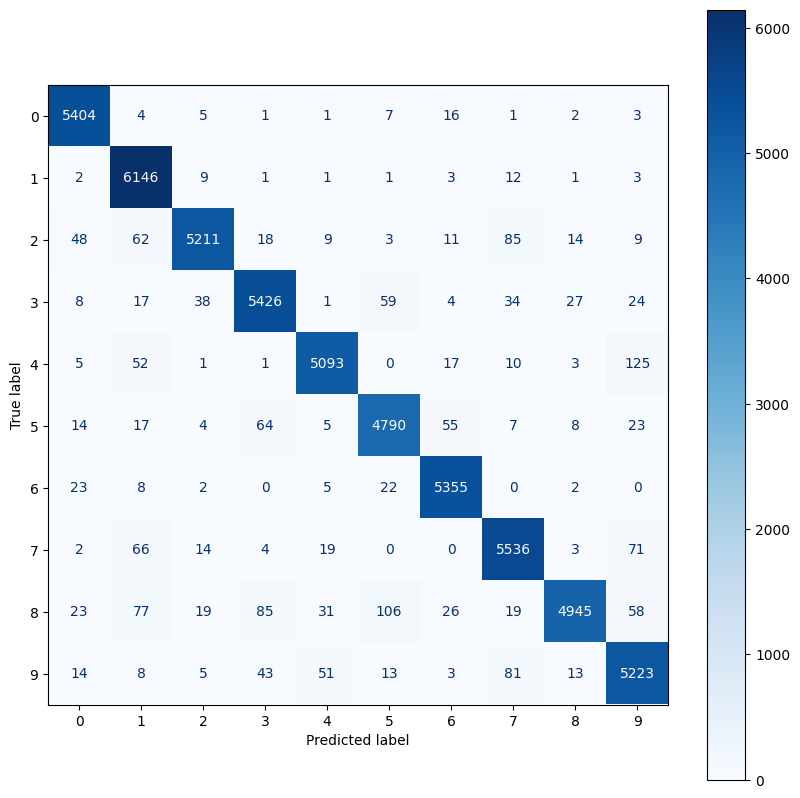

In [ ]:
# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

Notice that the cell on the diagonal in row #5 and column #5 looks slightly
darker than the other digits. This could be because the model made more errors
on 5s, or because there are fewer 5s in the dataset than the other digits.That’s why it’s important to normalize the confusion matrix by dividing each value by the total number of images in the corresponding (true) class (i.e., divide by the row’s sum).

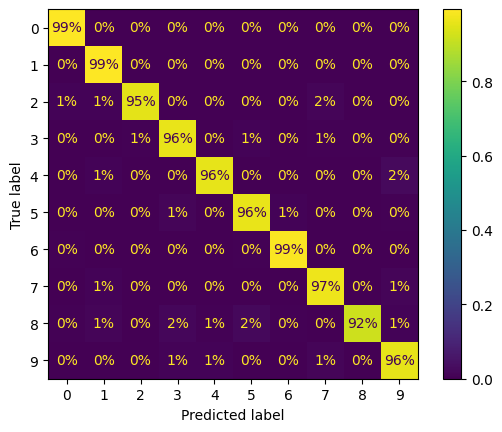

In [ ]:
# normalized by row
ConfusionMatrixDisplay.from_predictions(y_train, knn_preds,
                                        normalize="true", values_format=".0%")
# show percentages with no decimals
plt.show()

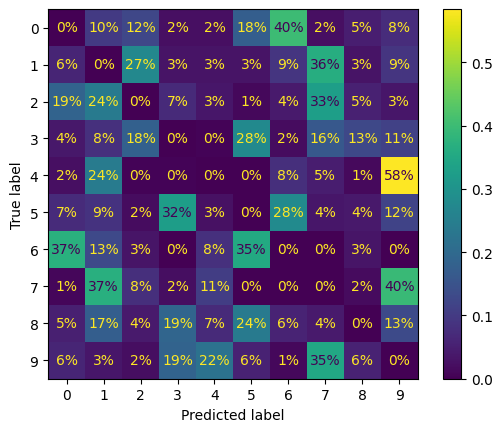

In [ ]:
# Confusion matrix with errors only
sample_weight = (knn_preds != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, knn_preds,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

## Grid Search
GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [ ]:
"""
'uniform' : uniform weights. All points in each neighborhood are weighted equally.
weights = 'distance' is in contrast to the default which is weights = 'uniform'. 
When weights are uniform, a simple majority vote of the nearest neighbors is used 
to assign cluster membership. When weights are distance weighted, the voting is 
proportional to the distance value. Nearby points will have a greater influence 
than more distance points (even if the counts of different groups are the similar).
Distance weighting is very useful for sparse data.
"""

k_range = list(range(3, 10))
param_grid = dict(n_neighbors=k_range, weights = ["uniform", "distance"])

In [ ]:
# defining parameter range
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9705999999999999

In [ ]:
# Checking Accuracy on Test Data
knn_clf_best = KNeighborsClassifier(n_neighbors=4, weights = 'distance')
knn_clf_best.fit(X_train, y_train)
y_test_preds = knn_clf_best.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_test_preds)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 97.06%


# Chapter 3, Q2
Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.(You can use the shift() function from the scipy.ndimage.interpolation module. For example, shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right.)

Then, for each image in the training set, create four
shifted copies (one per direction) and add them to the training set. Finally, train
your best model on this expanded training set and measure its accuracy on the
test set. You should observe that your model performs even better now! This
technique of artificially growing the training set is called data augmentation or
training set expansion.


## Imports

In [ ]:
from scipy.ndimage.interpolation import shift

<ipython-input-37-c50379b1544a>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


## Data Augmentation

In [ ]:
some_digit = 42
image = X_train[some_digit].reshape(28,28)
# 2 pixel down, 1 pixel to the right
shifted_img = shift(image, [2, 1], cval=0) 
shifted_img

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

Text(0.5, 1.0, 'Shifted 2p-up, 1p-right')

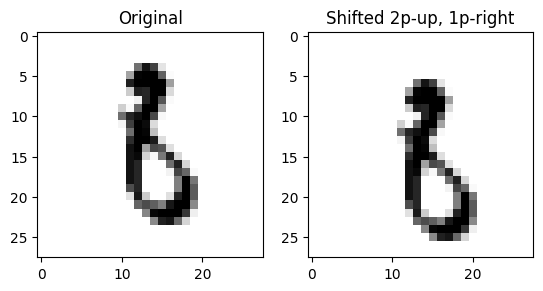

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[42].reshape(28,28), cmap = 'gray_r')
ax[0].set_title("Original")
ax[1].imshow(shifted_img, cmap = 'gray_r')
ax[1].set_title("Shifted 2p-up, 1p-right")

In [ ]:
image = X_train[10].reshape(28,28)
shifted_img_random = shift(image, [5, -5], cval=0) 
shifted_img_left = shift(image, [0, -5], cval=0) 
shifted_img_right = shift(image, [0, 5], cval=0) 
shifted_img_up = shift(image, [-8, 0], cval=0) 
shifted_img_down = shift(image, [8, 0], cval=0) 

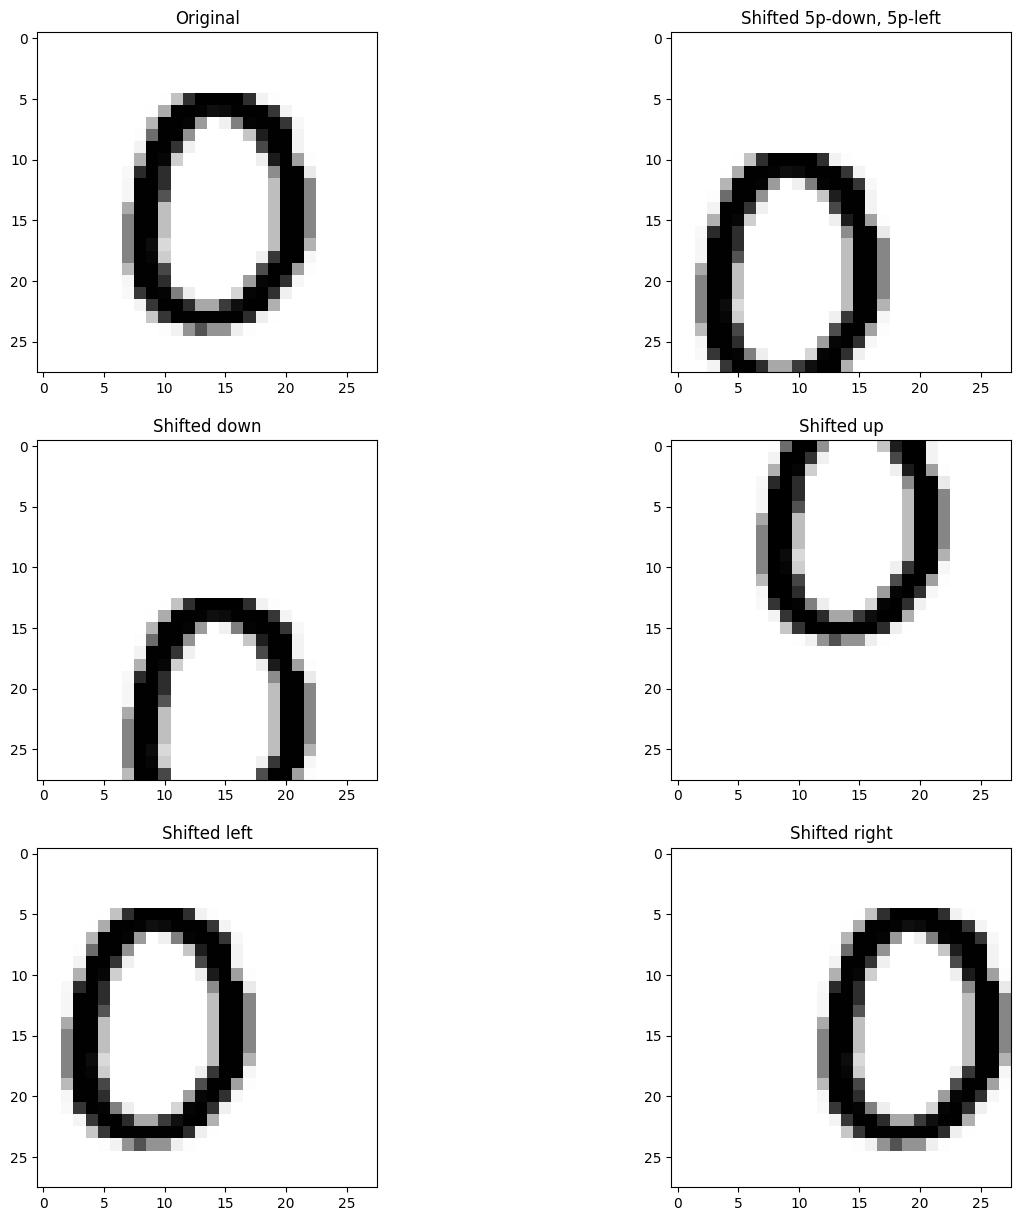

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(321)
plt.title("Original")
plt.imshow(image,
           interpolation="nearest", cmap="Greys")

plt.subplot(322)
plt.title("Shifted 5p-down, 5p-left")
plt.imshow(shifted_img_random,
           interpolation="nearest", cmap="Greys")

plt.subplot(323)
plt.title("Shifted down")
plt.imshow(shifted_img_down,
           interpolation="nearest", cmap="Greys")

plt.subplot(324)
plt.title("Shifted up")
plt.imshow(shifted_img_up,
           interpolation="nearest", cmap="Greys")

plt.subplot(325)
plt.title("Shifted left")
plt.imshow(shifted_img_left,
           interpolation="nearest", cmap="Greys")

plt.subplot(326)
plt.title("Shifted right")
plt.imshow(shifted_img_right,
           interpolation="nearest", cmap="Greys")


plt.show()

In [ ]:
# function

def shift_image(image,x,y) :
  shifted_images = []
  image = image.reshape(28,28)
  left_shifted_img = shift(image, [0, -x], cval=0) 
  right_shifted_img = shift(image, [0, x], cval=0) 
  up_shifted_img = shift(image, [y, 0], cval=0) 
  down_shifted_img = shift(image, [-y, 0], cval=0) 

  shifted_images.extend([left_shifted_img.reshape([-1]), right_shifted_img.reshape([-1]),
                         up_shifted_img.reshape([-1]), down_shifted_img.reshape([-1])])

  return shifted_images


In [ ]:
# cloning
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
len(X_train_augmented)

55000

In [ ]:
X_train_augmented[0].shape

(784,)

In [ ]:
for image, label in zip(X_train, y_train):
        # print("shape before: ", len(X_train_augmented) )
        X_train_augmented.extend(shift_image(image, 1, 1))
        # print("shape after ", len(X_train_augmented) )
        y_train_augmented.extend([label] * 4)

In [ ]:
len(X_train_augmented) # 55000 * 5

275000

In [ ]:
len(y_train_augmented)

275000

In [ ]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)
        digit = data[i]
        digit_image = digit.reshape(28, 28)
        plt.tight_layout()
        plt.imshow(digit_image, cmap = 'Greys')
        #plt.axis("off")

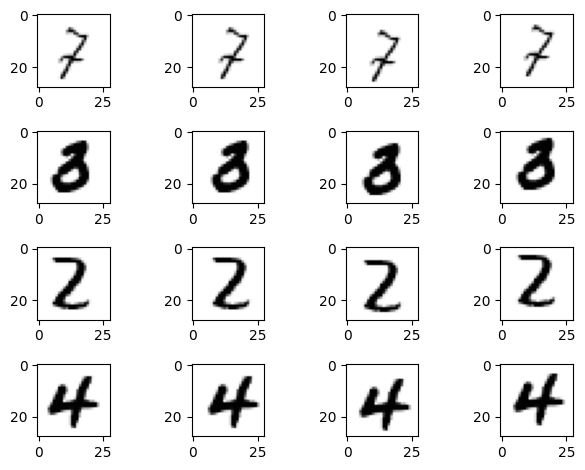

In [ ]:
plot_digits(X_train_augmented[60000:60016], row_size=4)
plt.show()

In [ ]:
y_train_augmented[60000:60016]

[7, 7, 7, 7, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 4]

In [ ]:
# from list to array
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
# Shuffle the training set
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
shuffle_idx

array([178253,  78381, 239978, ..., 262001, 240358, 158101])

## Training and Evaulating the best model

In [ ]:
knn_clf_augmented = KNeighborsClassifier(n_neighbors=4, weights = 'distance')
knn_clf_augmented.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
augmented_accuracy = knn_clf_augmented.score(X_test, y_test)
augmented_accuracy
# before - 97.06%
# 3 birim olunca 96.75'e düşüyor

0.9761

In [ ]:
# Checking Accuracy on Test Data
y_test_preds = knn_clf_augmented.predict(X_test) 
test_accuracy = accuracy_score(y_test,y_test_preds)*100
print("Accuracy for our testing dataset with data augmentation is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with data augmentation is : 97.61%


# Chapter 4, Q12
Implement batch gradient descent with early stopping for softmax regression
without using Scikit-Learn, only NumPy. Use it on a classification task such as
the iris dataset.

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes.

## Imports

In [ ]:
from sklearn.datasets import load_iris

## Load the Data

In [ ]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

## Take a quick look at the data

In [ ]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.filename

'iris.csv'

In [ ]:
iris.data_module

'sklearn.datasets.data'

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [ ]:
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (150, 2)
Shape of y :  (150,)


In [ ]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

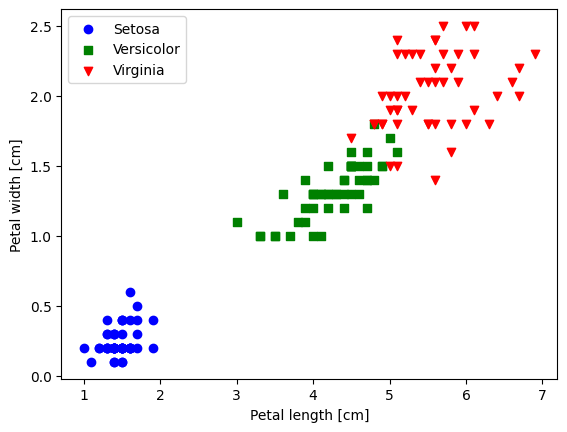

In [ ]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')

plt.scatter(X[100:150, 0], X[100:150, 1],
            color='red', marker='v', label='Virginia')

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
 
plt.show()

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Preprocessing

In [ ]:
# np.c_[np.array([1,2,3]), np.array([4,5,6])]
# Translates slice objects to concatenation along the second axis.
"""
array([[1, 4],
       [2, 5],
       [3, 6]])
"""

# Extend every input by x_0 = 1 and check shape
X = np.c_[np.ones(len(X)), X] # bias term
# check shape
print(X.shape)

(150, 3)


In [ ]:
X

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [ ]:
df = pd.DataFrame(np.transpose(X))
df.loc[len(df.index)] = y
df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
2,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
number_of_points = len(X)
number_of_points

150

In [ ]:
# split sizes
test_ratio = 0.2
validation_ratio = 0.2
total_size = number_of_points # 150 data points

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - (test_size + validation_size)

print("Training Set Size: ", train_size)
print("Validation Set Size: ", test_size)
print("Test Set Size: ", validation_size)

Training Set Size:  90
Validation Set Size:  30
Test Set Size:  30


In [ ]:
# split and shuffle
np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
X_train

array([[1. , 4.7, 1.2],
       [1. , 1.7, 0.3],
       [1. , 6.9, 2.3],
       [1. , 4.5, 1.5],
       [1. , 4.8, 1.4],
       [1. , 1.5, 0.4],
       [1. , 3.6, 1.3],
       [1. , 5.1, 2.3],
       [1. , 4.5, 1.5],
       [1. , 3.9, 1.2],
       [1. , 5.1, 2. ],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.3],
       [1. , 4.7, 1.6],
       [1. , 5.8, 2.2],
       [1. , 3.9, 1.1],
       [1. , 4.5, 1.3],
       [1. , 5.6, 2.2],
       [1. , 1.6, 0.2],
       [1. , 4.9, 1.8],
       [1. , 1.6, 0.4],
       [1. , 5.6, 2.1],
       [1. , 6.4, 2. ],
       [1. , 5.2, 2.3],
       [1. , 5.8, 1.8],
       [1. , 5.9, 2.3],
       [1. , 1.4, 0.3],
       [1. , 1.6, 0.2],
       [1. , 1. , 0.2],
       [1. , 1.5, 0.4],
       [1. , 4.4, 1.4],
       [1. , 1.6, 0.2],
       [1. , 1.3, 0.2],
       [1. , 5. , 1.9],
       [1. , 4.5, 1.5],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 5.1, 1.9],
       [1. , 4.5

In [ ]:
y_train

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1])

In [ ]:
# labels to categorical
def to_categorical(y) : 
  y_copy = []
  for label in y : 
    a = [0, 0, 0]
    if label == 0 : 
      a[0] = 1
    elif label == 1 :
      a[1] = 1
    elif label == 2 :
      a[2] = 1
    
    y_copy.append(a)

  y_one_hot = np.array(y_copy)
  return y_one_hot

In [ ]:
y_train = to_categorical(y_train)
y_train

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0,

In [ ]:
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
y_valid

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
X_train

array([[1. , 4.7, 1.2],
       [1. , 1.7, 0.3],
       [1. , 6.9, 2.3],
       [1. , 4.5, 1.5],
       [1. , 4.8, 1.4],
       [1. , 1.5, 0.4],
       [1. , 3.6, 1.3],
       [1. , 5.1, 2.3],
       [1. , 4.5, 1.5],
       [1. , 3.9, 1.2],
       [1. , 5.1, 2. ],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.3],
       [1. , 4.7, 1.6],
       [1. , 5.8, 2.2],
       [1. , 3.9, 1.1],
       [1. , 4.5, 1.3],
       [1. , 5.6, 2.2],
       [1. , 1.6, 0.2],
       [1. , 4.9, 1.8],
       [1. , 1.6, 0.4],
       [1. , 5.6, 2.1],
       [1. , 6.4, 2. ],
       [1. , 5.2, 2.3],
       [1. , 5.8, 1.8],
       [1. , 5.9, 2.3],
       [1. , 1.4, 0.3],
       [1. , 1.6, 0.2],
       [1. , 1. , 0.2],
       [1. , 1.5, 0.4],
       [1. , 4.4, 1.4],
       [1. , 1.6, 0.2],
       [1. , 1.3, 0.2],
       [1. , 5. , 1.9],
       [1. , 4.5, 1.5],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 5.1, 1.9],
       [1. , 4.5

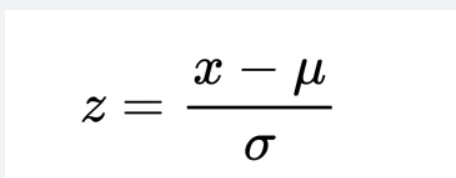

In [ ]:
# scaling, normalize except bias 
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [ ]:
X_train

array([[ 1.        ,  0.63935691,  0.10418645],
       [ 1.        , -1.04480275, -1.06791114],
       [ 1.        ,  1.87440733,  1.53675017],
       [ 1.        ,  0.5270796 ,  0.49488565],
       [ 1.        ,  0.69549556,  0.36465258],
       [ 1.        , -1.15708007, -0.93767807],
       [ 1.        ,  0.0218317 ,  0.23441952],
       [ 1.        ,  0.86391153,  1.53675017],
       [ 1.        ,  0.5270796 ,  0.49488565],
       [ 1.        ,  0.19024767,  0.10418645],
       [ 1.        ,  0.86391153,  1.14605097],
       [ 1.        , -1.21321872, -1.32837727],
       [ 1.        , -1.26935738, -1.1981442 ],
       [ 1.        , -1.15708007, -1.32837727],
       [ 1.        , -1.15708007, -1.06791114],
       [ 1.        ,  0.63935691,  0.62511871],
       [ 1.        ,  1.25688212,  1.4065171 ],
       [ 1.        ,  0.19024767, -0.02604661],
       [ 1.        ,  0.5270796 ,  0.23441952],
       [ 1.        ,  1.14460481,  1.4065171 ],
       [ 1.        , -1.10094141, -1.198

## Training


$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
# define softmax
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True) # row 
    return exps / exp_sums

In [ ]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train, axis = 0))  # == 3 (there are 3 iris classes)

In [ ]:
y_train.shape

(90, 3)

In [ ]:
n_inputs

3

In [ ]:
n_outputs

3

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [ ]:
eta = 0.5 # learning rate
n_epochs = 15001
m = len(X_train) # number of instances
epsilon = 1e-5 
best_loss = sys.maxsize

np.random.seed(42)
theta = np.random.randn(n_inputs, n_outputs) # randomly initialized model parameters
# [0,1) arası random values

train_loss = []
val_loss = []

for epoch in range(n_epochs):
  logits = X_train @ theta # sum , (150,3) @ (3,3) --> (150,3)
  y_proba = softmax(logits)

  # calculate the training loss 
  xentropy_losses_train = -(y_train * np.log(y_proba + epsilon))
  total_loss_train = xentropy_losses_train.sum(axis=1).mean()
  train_loss.append(total_loss_train)

  # calculate validation loss
  y_proba_valid = softmax(X_valid @ theta)
  xentropy_losses = -(y_valid * np.log(y_proba_valid + epsilon))
  total_loss = xentropy_losses.sum(axis=1).mean()
  val_loss.append(total_loss)

  if epoch % 1000 == 0:
        print("Epoch: ",epoch," - Loss: " ,total_loss.round(4))
  
  # calculate gradients and update weigt
  error = y_proba - y_train
  gradients = 1 / m * X_train.T @ error
  theta = theta - eta * gradients

Epoch:  0  - Loss:  3.7086
Epoch:  1000  - Loss:  0.1452
Epoch:  2000  - Loss:  0.1301
Epoch:  3000  - Loss:  0.1201
Epoch:  4000  - Loss:  0.1137
Epoch:  5000  - Loss:  0.11
Epoch:  6000  - Loss:  0.108
Epoch:  7000  - Loss:  0.1071
Epoch:  8000  - Loss:  0.1068
Epoch:  9000  - Loss:  0.1068
Epoch:  10000  - Loss:  0.1071
Epoch:  11000  - Loss:  0.1075
Epoch:  12000  - Loss:  0.108
Epoch:  13000  - Loss:  0.1084
Epoch:  14000  - Loss:  0.109
Epoch:  15000  - Loss:  0.1095


In [ ]:
eta = 0.5 # learning rate
n_epochs = 15001
m = len(X_train) # number of instances
epsilon = 1e-5 
best_loss = sys.maxsize

np.random.seed(42)
theta = np.random.randn(n_inputs, n_outputs) # randomly initialized model parameters
# [0,1) arası random values

train_loss = []
val_loss = []

for epoch in range(n_epochs):
  logits = X_train @ theta # sum , (150,3) @ (3,3) --> (150,3)
  y_proba = softmax(logits)

  # calculate the training loss 
  xentropy_losses_train = -(y_train * np.log(y_proba + epsilon))
  total_loss_train = xentropy_losses_train.sum(axis=1).mean()
  train_loss.append(total_loss_train)

  # calculate validation loss
  y_proba_valid = softmax(X_valid @ theta)
  xentropy_losses = -(y_valid * np.log(y_proba_valid + epsilon))
  total_loss = xentropy_losses.sum(axis=1).mean()
  val_loss.append(total_loss)

  if epoch % 1000 == 0:
        print("Epoch: ",epoch," - Loss: " ,total_loss.round(4))
 
  # update best loss
  if total_loss < best_loss:
        best_loss = total_loss

  # early stopping
  else:
        print("---")
        print("Loss of the previous Epoch is smaller, time to stop")
        print("Previous Epoch: ",epoch - 1, " and its Loss: ", best_loss)
        print("Epoch: ",epoch," - Loss: " ,total_loss, " --> Early Stopping")
        break
  
  # calculate gradients and update weigt
  error = y_proba - y_train
  gradients = 1 / m * X_train.T @ error
  theta = theta - eta * gradients

Epoch:  0  - Loss:  3.7086
Epoch:  1000  - Loss:  0.1452
Epoch:  2000  - Loss:  0.1301
Epoch:  3000  - Loss:  0.1201
Epoch:  4000  - Loss:  0.1137
Epoch:  5000  - Loss:  0.11
Epoch:  6000  - Loss:  0.108
Epoch:  7000  - Loss:  0.1071
Epoch:  8000  - Loss:  0.1068
---
Loss of the previous Epoch is smaller, time to stop
Previous Epoch:  8301  and its Loss:  0.10677762811061084
Epoch:  8302  - Loss:  0.10677762836724909  --> Early Stopping


In [ ]:
theta

array([[ 0.61792877,  6.898904  , -6.51069438],
       [-7.38909415, -1.58166658, 10.02550026],
       [-5.93348223,  0.64543987,  7.16521552]])

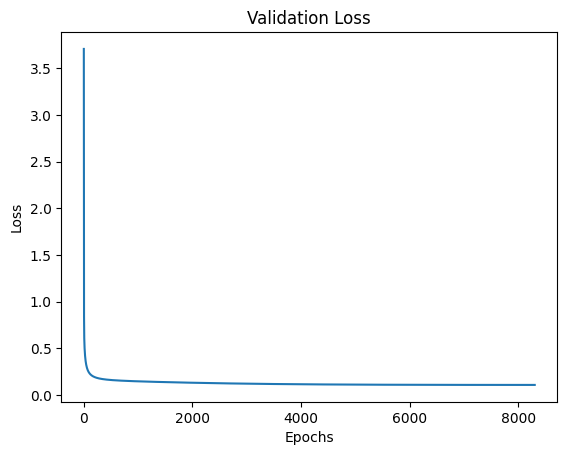

In [ ]:
# Generate a sequence of integers to represent the epoch numbers
epochs = range(0, 8303)
 
# Plot and label the validation loss values
plt.plot(epochs, val_loss, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Display the plot
plt.show()

## Accuracy

In [ ]:
logits = X_valid @ theta
y_proba = softmax(logits)
y_predict = y_proba.argmax(axis=1)
y_predict = to_categorical(y_predict)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9555555555555556

In [ ]:
y_proba

array([[1.36499482e-02, 9.86350020e-01, 3.22605499e-08],
       [1.87289778e-15, 2.62741774e-05, 9.99973726e-01],
       [6.76038501e-08, 3.33232545e-01, 6.66767387e-01],
       [2.09619864e-08, 9.50502561e-02, 9.04949723e-01],
       [3.75149229e-17, 1.93899148e-06, 9.99998061e-01],
       [9.57001979e-05, 9.99783528e-01, 1.20772122e-04],
       [9.99824413e-01, 1.75586707e-04, 8.17485033e-20],
       [9.99971966e-01, 2.80341617e-05, 7.90583312e-22],
       [4.57825822e-07, 6.91490967e-01, 3.08508575e-01],
       [5.04604817e-13, 2.59556113e-04, 9.99740444e-01],
       [9.99756751e-01, 2.43249211e-04, 2.17285410e-19],
       [9.99586487e-01, 4.13512678e-04, 4.50020468e-19],
       [9.99873257e-01, 1.26742904e-04, 3.07553646e-20],
       [7.44223043e-07, 8.11334871e-01, 1.88664384e-01],
       [9.04149921e-16, 2.15658639e-05, 9.99978434e-01],
       [9.99586487e-01, 4.13512678e-04, 4.50020468e-19],
       [4.01021774e-13, 5.28206208e-04, 9.99471794e-01],
       [3.28907001e-18, 6.80858

In [ ]:
y_predict

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

## Test

In [ ]:
logits = X_test @ theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)
y_predict = to_categorical(y_predict)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9777777777777777